## 필수과제1
- kmeans의 군집화의 inertia의 값이 의미하는 것이 어떤 것인지?
- 구체적으로 개념 정리하고, 실제 시각화 코드를 통해서 인사이트를 도출해 보기!

### inertia: 클러스터의 중심과 클러스터에 속한 샘플 사이의 거리의 제곱합
- 클러스터에 속한 샘플들이 얼마나 가깝게 모여있는지 나타내는 값
- 일반적으로 클러스터의 개수가 늘어나면 클러스터 개개의 크기는 줄어듦으로, 이너셔 또한 줄어든다.


In [3]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.options.display.float_format = '{:.8f}'.format

In [2]:
df = pd.read_csv('c:/wine_test.csv')
df_sp=df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']]
df_sp.dropna(inplace=True)

C:\Users\KYW\AppData\Local\Temp\ipykernel_27644\3568945014.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp.dropna(inplace=True)


In [4]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df_sp)
pd.DataFrame(df_scaled)
df_sc_sp = pd.DataFrame(df_scaled, columns = df_sp.columns)

c:\Users\KYW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1588.2201435101892
1218.002895939455
1121.5903343961145
1052.7050108195651
1006.8909576431566
951.364243388746
894.0767969978943


c:\Users\KYW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KYW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KYW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KYW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

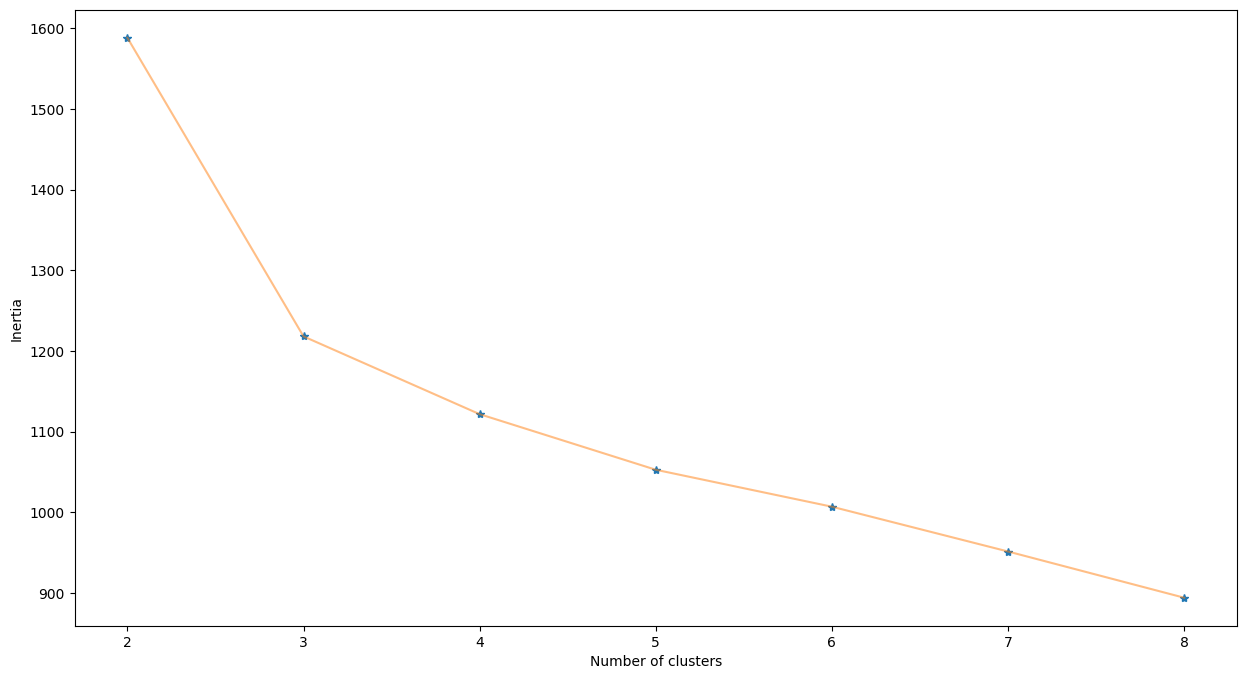

In [5]:
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance=[]
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters = n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        print(kmeans.inertia_)
        
    plt.figure(1, figsize=(15,8))
    plt.plot(n_clusters, sum_of_squared_distance, '*')
    plt.plot(n_clusters, sum_of_squared_distance, '-', alpha=0.5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')

n_clusters = [2,3,4,5,6,7,8]
change_n_clusters(n_clusters, df_scaled)

> 클러스터의 개수가 늘어날수록 클러스터의 중심과 샘플 사이의 거리가 줄어들 수밖에 없다.

> 어느 이상으로 나눠지면 클러스터링의 의미가 없다.